# Homework 5

Write programs which do gray-scale morphology on a gray-scale image(lena.bmp):
(a) Dilation
(b) Erosion
(c) Opening
(d) Closing

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread('lena.bmp', cv2.IMREAD_GRAYSCALE)
h, w = img.shape[0], img.shape[1]

In [2]:
#set kernel
ker = np.zeros([21, 2], dtype='int8')
#octogonal 3-5-5-5-3 kernel
ker[0] = [-2, -1]
ker[1] = [-2, 0]
ker[2] = [-2, 1]
ker[3] = [-1, -2]
ker[4] = [-1, -1]
ker[5] = [-1, 0]
ker[6] = [-1, 1]
ker[7] = [-1, 2]
ker[8] = [0, -2]
ker[9] = [0, -1]
ker[10] = [0, 0]
ker[11] = [0, 1]
ker[12] = [0, 2]
ker[13] = [1, -2]
ker[14] = [1, -1]
ker[15] = [1, 0]
ker[16] = [1, 1]
ker[17] = [1, 2]
ker[18] = [2, -1]
ker[19] = [2, 0]
ker[20] = [2, 1]

In [3]:
#gray scale dilation
def Dilation(img):
    new_img = np.zeros([h, w], dtype=img.dtype)
    for i in range(h):
        for j in range(w):
            max = 0
            for k in range(21):
                x, y = i - ker[k][0], j - ker[k][1]
                if (x >= 0 and x < h and y >= 0 and y < w):
                    if (img[x][y] > max):
                        max = img[x][y]
            new_img[i][j] = max
    return new_img

In [4]:
#gray scale erosion
def Erosion(img):
    new_img = np.zeros([h, w], dtype=img.dtype)
    for i in range(h):
        for j in range(w):
            min = 255
            for k in range(21):
                x, y = i + ker[k][0], j + ker[k][1]
                if (x >= 0 and x < h and y >= 0 and y < w):
                    if (img[x][y] < min):
                        min = img[x][y]
            new_img[i][j] = min
    return new_img

In [5]:
#gray scale opening
def Opening(img):
    new_img = np.zeros([h, w], dtype=img.dtype)
    new_img = img
    return Dilation(Erosion(new_img))

In [6]:
#gray scale closing
def Closing(img):
    new_img = np.zeros([h, w], dtype=img.dtype)
    new_img = img
    return Erosion(Dilation(new_img))

In [7]:
#顯示影像
def show_result(img):
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(img)
    plt.axis('off')
    plt.show()

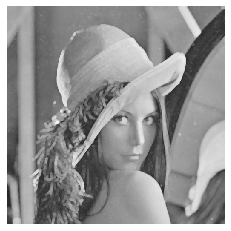

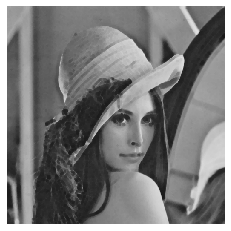

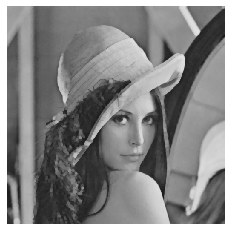

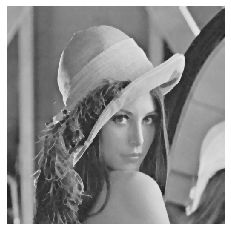

In [8]:
show_result(Dilation(img))
show_result(Erosion(img))
show_result(Opening(img))
show_result(Closing(img))